### News Mood Sentiment Analysis

#### By: Naser Erwemi

https://www.linkedin.com/in/aerwemi/

https://github.com/aerwemi

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

## News Mood

A python script to perform sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, New York Times and 
The Washington Post__.



The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Included analysis:

* Pull last 100 tweets from each outlet.
* Sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* A DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* DataFrame into a CSV file.
* PNG images for each plot.

# Studay Summary and Conclusions


BBC and CBS has much fewer tweets and followers than other outlets.

BBC and CBS tweets are more positive than other outlets. Tweets normally distributed for most of the news outlets with most of the tweets are neutral scores.

BBC and CBS have similar polarity distribution. 

CNN, Fox, New York Times and The Washington Post have similar polarity distribution. 

CNN, Fox, NY time and WP are more negative than BBC can CBS with distribution slightly skewed to the negative side. 

Time series analysis may help understand the frequency of tweets Where BBC and CBS tweets less than other outlets. 


In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
analyzer.polarity_scores('This is not Good, but only somtimes')


{'compound': -0.1786, 'neg': 0.221, 'neu': 0.779, 'pos': 0.0}

In [7]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
#list of the news outlet - on Tweeter 

#news_outlets=['CNN', 'FoxNews' , 'nytimes', 'washingtonpost'] # added WP as it is simlar to nytimes
news_outlets=['BBC', 'CBS', 'CNN', 'FoxNews' , 'nytimes', 'washingtonpost']

In [9]:
#Initiating and empty table to hold data from twitter   
cols=['Tweets', 'Followers', 'Following', 'Favorites Count']
popular_news= pd.DataFrame(index=news_outlets ,columns=cols).reset_index()
popular_news=popular_news.rename(columns = {'index':'Screen Name'})
popular_news

,Screen Name,Tweets,Followers,Following,Favorites Count
0,BBC,NaN,NaN,NaN,NaN
1,CBS,NaN,NaN,NaN,NaN
2,CNN,NaN,NaN,NaN,NaN
3,FoxNews,NaN,NaN,NaN,NaN
4,nytimes,NaN,NaN,NaN,NaN
5,washingtonpost,NaN,NaN,NaN,NaN


In [11]:
user_account = api.get_user('BBC')
user_account
user_real_name = user_account["name"]

In [12]:
# Iterate through DataFrame
for index, row in popular_news.iterrows():
    try:
        # Grab the username
        target_user = row["Screen Name"]
        # print(target_user)

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_news.set_value(index, "Real Name", user_real_name)
        popular_news.set_value(index, "Tweets", user_tweets)
        popular_news.set_value(index, "Followers", user_followers)
        popular_news.set_value(index, "Following", user_following)
        popular_news.set_value(index, "Favorites Count", user_favorites)

    except tweepy.TweepError as e:
        print(e)
        
#set index with Real Name for nice ploting 
popular_news.set_index('Real Name', inplace=True)
popular_news

,Screen Name,Tweets,Followers,Following,Favorites Count
Real Name,,,,,
BBC,BBC,25606,1398022,182,3589
CBS,CBS,16770,991825,503,1952
CNN,CNN,192481,39971705,1115,1461
Fox News,FoxNews,395076,17754561,408,0
The New York Times,nytimes,326348,41591706,887,17138
Washington Post,washingtonpost,276748,12574726,1485,4524


C:\Users\aerwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


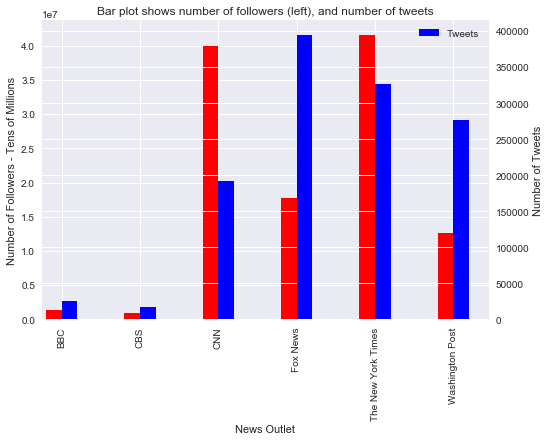

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

popular_news['Followers'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
popular_news['Tweets'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Followers - Tens of Millions')
ax2.set_ylabel('Number of Tweets')
ax.set_xlabel('News Outlet')

plt.title('Bar plot shows number of followers (left), and number of tweets')
plt.legend()

plt.savefig('Bar plot_number followers_tweets')
plt.show()

In [15]:
# making dir for porper label real name vs. screen name 

real_name=popular_news.reset_index()['Real Name'].tolist()
scre_name=popular_news.reset_index()['Screen Name'].tolist()

real_name_dir={}


for i in range(len(real_name)):
    real_name_dir[scre_name[i]]=real_name[i]


real_name_dir

{'BBC': 'BBC',
 'CBS': 'CBS',
 'CNN': 'CNN',
 'FoxNews': 'Fox News',
 'nytimes': 'The New York Times',
 'washingtonpost': 'Washington Post'}

In [16]:
news_outlets

['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'washingtonpost']

In [17]:
# Target User
#news_outlets =('CBS', 'CNN' ) 

#Create Dir to hold extracted data 
sentement_scores={}

for news_outlet in news_outlets:

    # Place holders 
    date_time   =[]
    tweet_texts =[]
    compounds   =[] 
    neg_score   =[]
    pos_score   =[]
    neu_score   =[]
    tweet_num   =[]

    # Create a loop to iteratively run API requests
    num=1
    for tweet_page in range(1,6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(news_outlet, page=tweet_page)

        # Loop through all tweets
        for tweet in public_tweets:


            # tweet Number 
            tweet_num.append(num)
            num+=1
            # Print Tweet
            #print(tweet["text"])
            
            #extract date 
            date_time.append(tweet['created_at'])

            # Store Tweet in Array
            tweet_texts.append(tweet["text"])
            
            # store veda in array 
            compound=analyzer.polarity_scores(tweet["text"])['compound']
            
            #print(compound)
            compounds.append(compound)
            
            neg=analyzer.polarity_scores(tweet["text"])['neg']
            neg_score.append(neg)
            
            # print most neg news
            if neg > .5:
                print(tweet["text"])
                print(news_outlet)
                print(f'Negative News Score (0 to 1) : {neg}')
                print('__')
                

            
            pos=analyzer.polarity_scores(tweet["text"])['pos']
            pos_score.append(pos)
            
            # print most pos news 
            if pos > .5:
                print(tweet["text"])
                print(news_outlet)
                print(f'Positive News Score (0 to 1): {pos}')
                print('__')
            
            neu=analyzer.polarity_scores(tweet["text"])['neu']
            neu_score.append(neu)
    
    #Dirctory with all data for the current news outlet 
    sentement_scores[news_outlet]=(tweet_num, date_time, compounds, neg_score, pos_score, neu_score, tweet_texts)

Inspiration: Get to your YES! #OnceOnThisIsland #TonyAwards https://t.co/Wjp0QIWfXq
CBS
Positive News Score (0 to 1): 0.543
__
The feeling when you win a Tony. 🙌 Congratulations to Once on This Island for winning Best Revival of a Musical!… https://t.co/UpFCqgBTwh
CBS
Positive News Score (0 to 1): 0.55
__
Angels in America takes the win for Best Revival of a Play! #TonyAwards https://t.co/zodW61tw8a
CBS
Positive News Score (0 to 1): 0.517
__
@writerlindsayb You're welcome! #TonyAwards
CBS
Positive News Score (0 to 1): 0.523
__
RT @hjmayer8: I sure do love @DearEvanHansen 💙 #TonyAwards
CBS
Positive News Score (0 to 1): 0.565
__
Glenda Jackson wins Best Leading Actress in a Play. #TonyAwards @threetallwomen https://t.co/GRp1gcBuiW
CBS
Positive News Score (0 to 1): 0.563
__
Nathan Lane wins Best Featured Actor in a Play. #TonyAwards @angelsbway https://t.co/xc8M7JtLDE
CBS
Positive News Score (0 to 1): 0.563
__
✨ @LindsayMendez wins Best Featured Actress in a Musical! #TonyAwards @carousel

In [34]:
pd.DataFrame(sentement_scores).reset_index()

,index,BBC,CBS,CNN,FoxNews,nytimes,washingtonpost
0,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1,"[Fri Jul 13 12:03:03 +0000 2018, Fri Jul 13 11...","[Thu Jul 12 01:01:24 +0000 2018, Wed Jul 11 21...","[Fri Jul 13 13:14:13 +0000 2018, Fri Jul 13 13...","[Fri Jul 13 13:17:50 +0000 2018, Fri Jul 13 13...","[Fri Jul 13 13:17:12 +0000 2018, Fri Jul 13 13...","[Fri Jul 13 13:18:40 +0000 2018, Fri Jul 13 13..."
2,2,"[-0.7579, 0.3182, 0.0, 0.0, 0.0, 0.1779, 0.0, ...","[0.6514, 0.5562, 0.5411, 0.0, -0.3818, 0.3182,...","[0.4466, 0.4877, 0.0, 0.0, 0.296, 0.6597, 0.0,...","[-0.6115, 0.0, 0.4404, 0.7783, 0.6467, 0.7096,...","[0.5972, -0.5707, 0.0, -0.34, 0.0, 0.0, -0.510...","[-0.0772, -0.6705, -0.6369, -0.0516, 0.0258, -..."
3,3,"[0.427, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.071, 0...","[0.0, 0.0, 0.0, 0.0, 0.106, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.188, 0.0...","[0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.268...","[0.0, 0.178, 0.0, 0.118, 0.0, 0.0, 0.223, 0.0,...","[0.181, 0.333, 0.271, 0.148, 0.0, 0.111, 0.241..."
4,4,"[0.155, 0.119, 0.0, 0.0, 0.0, 0.091, 0.0, 0.0,...","[0.282, 0.174, 0.143, 0.0, 0.0, 0.103, 0.153, ...","[0.118, 0.131, 0.0, 0.0, 0.167, 0.252, 0.0, 0....","[0.0, 0.0, 0.153, 0.298, 0.274, 0.219, 0.157, ...","[0.223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.066, 0.0, 0...","[0.152, 0.0, 0.0, 0.137, 0.099, 0.0, 0.0, 0.0,..."
5,5,"[0.418, 0.881, 1.0, 1.0, 1.0, 0.909, 1.0, 0.92...","[0.718, 0.826, 0.857, 1.0, 0.894, 0.897, 0.847...","[0.882, 0.869, 1.0, 1.0, 0.833, 0.748, 1.0, 0....","[0.8, 1.0, 0.847, 0.702, 0.726, 0.781, 0.843, ...","[0.777, 0.822, 1.0, 0.882, 1.0, 1.0, 0.711, 1....","[0.667, 0.667, 0.729, 0.714, 0.901, 0.889, 0.7..."
6,6,"[The secret to a long, happy relationship? \n\...",[RT @TKOCBS: Prepare to have some major FUN. #...,[President Trump tells British PM Theresa May ...,"[.@POTUS: ""[Immigration is] changing the cultu...","[""I didn't criticize the prime minister"": Pres...","[Britain greets Trump with protests, ""Trump Ba..."


In [35]:
# a function to to make data frame for each news outlet data 

def pol_df(news_outlet):
    scores={'Tweet_number': sentement_scores[news_outlet][0],
            'Date':sentement_scores[news_outlet][1],
            'Compound':sentement_scores[news_outlet][2],
            'Negative':sentement_scores[news_outlet][3],
            'Positive':sentement_scores[news_outlet][4],
            'Neutral':sentement_scores[news_outlet][5],
            'Tweet':sentement_scores[news_outlet][6],
            'News_outlet': news_outlet
           }
    return(pd.DataFrame(scores)) 

In [63]:
news_outlets_sentements =  pol_df(news_outlets[0])

for news_outlet in news_outlets[1:]:
    news_outletDf=pol_df(news_outlet)
    frames=[news_outlets_sentements, news_outletDf]
    news_outlets_sentements = pd.concat(frames)

    
news_outlets_sentements.reset_index(drop=True, inplace=True)
news_outlets_sentements

print(news_outlets_sentements.head())
print(news_outlets_sentements.tail())
print(news_outlets_sentements.shape)

   Compound                            Date  Negative  Neutral News_outlet  \
0   -0.7579  Fri Jul 13 12:03:03 +0000 2018     0.427    0.418         BBC   
1    0.3182  Fri Jul 13 11:03:03 +0000 2018     0.000    0.881         BBC   
2    0.0000  Fri Jul 13 10:01:02 +0000 2018     0.000    1.000         BBC   
3    0.0000  Fri Jul 13 09:59:32 +0000 2018     0.000    1.000         BBC   
4    0.0000  Fri Jul 13 08:03:04 +0000 2018     0.000    1.000         BBC   

   Positive                                              Tweet  Tweet_number  
0     0.155  The secret to a long, happy relationship? \n\n...             1  
1     0.119  The original 1926 map of The Hundred Acre Wood...             2  
2     0.000  RT @bbcproms: A Spectacular curtain raiser las...             3  
3     0.000  RT @BBCTheOneShow: It's @ChrisGPackham UK Biob...             4  
4     0.000  Who is the mysterious Hester Appleyard?\n\nNat...             5  
     Compound                            Date  Negative  

In [70]:
# map the real name instd of screen name for proper labeling 
print('****************************Before**********************************')
print ([i for i in set(news_outlets_sentements['News_outlet'].tolist())])

news_outlets_sentements['News_outlet'] = news_outlets_sentements['News_outlet'].map(real_name_dir)
print('****************************After**********************************')
print ([i for i in set(news_outlets_sentements['News_outlet'].tolist())])


****************************Before**********************************
['washingtonpost', 'CBS', 'CNN', 'BBC', 'FoxNews', 'nytimes']
****************************After**********************************
['CBS', 'Washington Post', 'Fox News', 'CNN', 'BBC', 'The New York Times']


In [72]:
news_outlets_sentements.head()

,Compound,Date,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number
0,-0.7579,Fri Jul 13 12:03:03 +0000 2018,0.427,0.418,BBC,0.155,"The secret to a long, happy relationship? \n\n...",1
1,0.3182,Fri Jul 13 11:03:03 +0000 2018,0.000,0.881,BBC,0.119,The original 1926 map of The Hundred Acre Wood...,2
2,0.0000,Fri Jul 13 10:01:02 +0000 2018,0.000,1.000,BBC,0.000,RT @bbcproms: A Spectacular curtain raiser las...,3
3,0.0000,Fri Jul 13 09:59:32 +0000 2018,0.000,1.000,BBC,0.000,RT @BBCTheOneShow: It's @ChrisGPackham UK Biob...,4
4,0.0000,Fri Jul 13 08:03:04 +0000 2018,0.000,1.000,BBC,0.000,Who is the mysterious Hester Appleyard?\n\nNat...,5


In [76]:
# Working with the Dates 

import datetime as DTime

In [83]:
from datetime import datetime
date_time

['Fri Jul 13 13:18:40 +0000 2018',
 'Fri Jul 13 13:14:09 +0000 2018',
 'Fri Jul 13 13:07:29 +0000 2018',
 'Fri Jul 13 13:06:20 +0000 2018',
 'Fri Jul 13 12:59:41 +0000 2018',
 'Fri Jul 13 12:53:15 +0000 2018',
 'Fri Jul 13 12:50:41 +0000 2018',
 'Fri Jul 13 12:44:49 +0000 2018',
 'Fri Jul 13 12:36:25 +0000 2018',
 'Fri Jul 13 12:27:50 +0000 2018',
 'Fri Jul 13 12:22:15 +0000 2018',
 'Fri Jul 13 12:15:38 +0000 2018',
 'Fri Jul 13 12:11:00 +0000 2018',
 'Fri Jul 13 12:02:38 +0000 2018',
 'Fri Jul 13 11:57:05 +0000 2018',
 'Fri Jul 13 11:46:24 +0000 2018',
 'Fri Jul 13 11:41:04 +0000 2018',
 'Fri Jul 13 11:35:49 +0000 2018',
 'Fri Jul 13 11:27:50 +0000 2018',
 'Fri Jul 13 11:22:36 +0000 2018',
 'Fri Jul 13 11:17:28 +0000 2018',
 'Fri Jul 13 11:12:24 +0000 2018',
 'Fri Jul 13 11:06:09 +0000 2018',
 'Fri Jul 13 11:00:44 +0000 2018',
 'Fri Jul 13 10:53:20 +0000 2018',
 'Fri Jul 13 10:52:57 +0000 2018',
 'Fri Jul 13 10:46:05 +0000 2018',
 'Fri Jul 13 10:40:10 +0000 2018',
 'Fri Jul 13 10:30:1

In [98]:
for raw_stamp in raw_date:
    print(raw_stamp)
    print(datetime.strptime(raw_stamp, "%a %b %d %H:%M:%S %z %Y"))
    print('----')

Fri Jul 13 12:03:03 +0000 2018
2018-07-13 12:03:03+00:00
----
Fri Jul 13 11:03:03 +0000 2018
2018-07-13 11:03:03+00:00
----
Fri Jul 13 10:01:02 +0000 2018
2018-07-13 10:01:02+00:00
----
Fri Jul 13 09:59:32 +0000 2018
2018-07-13 09:59:32+00:00
----
Fri Jul 13 08:03:04 +0000 2018
2018-07-13 08:03:04+00:00
----
Fri Jul 13 07:27:05 +0000 2018
2018-07-13 07:27:05+00:00
----
Fri Jul 13 07:03:02 +0000 2018
2018-07-13 07:03:02+00:00
----
Thu Jul 12 20:02:02 +0000 2018
2018-07-12 20:02:02+00:00
----
Thu Jul 12 18:04:07 +0000 2018
2018-07-12 18:04:07+00:00
----
Thu Jul 12 17:03:06 +0000 2018
2018-07-12 17:03:06+00:00
----
Thu Jul 12 16:03:02 +0000 2018
2018-07-12 16:03:02+00:00
----
Thu Jul 12 14:47:18 +0000 2018
2018-07-12 14:47:18+00:00
----
Thu Jul 12 13:04:03 +0000 2018
2018-07-12 13:04:03+00:00
----
Thu Jul 12 12:04:04 +0000 2018
2018-07-12 12:04:04+00:00
----
Thu Jul 12 11:43:48 +0000 2018
2018-07-12 11:43:48+00:00
----
Thu Jul 12 11:02:03 +0000 2018
2018-07-12 11:02:03+00:00
----
Thu Jul 

----
Fri Jul 13 08:10:50 +0000 2018
2018-07-13 08:10:50+00:00
----
Fri Jul 13 07:43:49 +0000 2018
2018-07-13 07:43:49+00:00
----
Fri Jul 13 07:17:08 +0000 2018
2018-07-13 07:17:08+00:00
----
Fri Jul 13 06:49:06 +0000 2018
2018-07-13 06:49:06+00:00
----
Fri Jul 13 06:40:06 +0000 2018
2018-07-13 06:40:06+00:00
----
Fri Jul 13 06:15:02 +0000 2018
2018-07-13 06:15:02+00:00
----
Fri Jul 13 05:47:46 +0000 2018
2018-07-13 05:47:46+00:00
----
Fri Jul 13 05:20:29 +0000 2018
2018-07-13 05:20:29+00:00
----
Fri Jul 13 04:55:21 +0000 2018
2018-07-13 04:55:21+00:00
----
Fri Jul 13 04:27:11 +0000 2018
2018-07-13 04:27:11+00:00
----
Fri Jul 13 04:00:10 +0000 2018
2018-07-13 04:00:10+00:00
----
Fri Jul 13 03:52:36 +0000 2018
2018-07-13 03:52:36+00:00
----
Fri Jul 13 03:49:01 +0000 2018
2018-07-13 03:49:01+00:00
----
Fri Jul 13 03:22:26 +0000 2018
2018-07-13 03:22:26+00:00
----
Fri Jul 13 03:22:02 +0000 2018
2018-07-13 03:22:02+00:00
----
Fri Jul 13 03:22:02 +0000 2018
2018-07-13 03:22:02+00:00
----
Fri

In [84]:
# Working with the Dates 
raw_date=news_outlets_sentements['Date'].tolist()
dates=[datetime.strptime(raw_stamp, "%a %b %d %H:%M:%S %z %Y") for raw_stamp in raw_date]
dates_array=np.asarray(dates)
#pd.Series(test3)
news_outlets_sentements.insert(0, 'Date_time', dates_array)



In [101]:
#drop old raw date 
news_outlets_sentements.drop('Date', axis=1, inplace=True)

#QC Step 
news_outlets_sentements.head() # check data - should have all the outles . head  

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number
0,2018-07-13 12:03:03+00:00,-0.7579,0.427,0.418,BBC,0.155,"The secret to a long, happy relationship? \n\n...",1
1,2018-07-13 11:03:03+00:00,0.3182,0.000,0.881,BBC,0.119,The original 1926 map of The Hundred Acre Wood...,2
2,2018-07-13 10:01:02+00:00,0.0000,0.000,1.000,BBC,0.000,RT @bbcproms: A Spectacular curtain raiser las...,3
3,2018-07-13 09:59:32+00:00,0.0000,0.000,1.000,BBC,0.000,RT @BBCTheOneShow: It's @ChrisGPackham UK Biob...,4
4,2018-07-13 08:03:04+00:00,0.0000,0.000,1.000,BBC,0.000,Who is the mysterious Hester Appleyard?\n\nNat...,5


In [119]:
#QC Step 
news_outlets_sentements.tail() # check data - should have all the outles . tail for last news outlet  

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number
195,2018-07-12 13:00:07+00:00,0.0000,0.000,1.000,CNN,0.000,The Medicaid website has hidden a batch of Oba...,96
196,2018-07-12 12:50:05+00:00,-0.4460,0.349,0.513,CNN,0.138,"Facebook touts its fight on fake news, but str...",97
197,2018-07-12 12:40:08+00:00,0.0000,0.000,1.000,CNN,0.000,5 things for Thursday:\n\n- NATO summit\n- Imm...,98
198,2018-07-12 12:30:10+00:00,0.7950,0.000,0.665,CNN,0.335,'I think they like me there:' President Trump ...,99
199,2018-07-12 12:21:05+00:00,-0.1027,0.174,0.674,CNN,0.152,How President Trump's disdain for NATO could h...,100


In [102]:
# QC step 
news_outlets_sentements.shape # should have number of rows - for this case study 600 

(600, 8)

In [103]:
# QC step 
set(news_outlets_sentements['News_outlet'].tolist()) # check if all outlets are extracted and yes 6 of them 

{'BBC', 'CBS', 'CNN', 'Fox News', 'The New York Times', 'Washington Post'}

In [105]:
news_outlets_sentements.to_csv('news_outlets_sentements.csv')

In [106]:
# dates for disply 
dates=news_outlets_sentements.Date_time.sort_values()
date_1st=dates.iloc[0]
date_end=dates.iloc[-1]
date_1st

Timestamp('2018-06-05 15:04:41+0000', tz='UTC')

In [107]:
date_start=f'{date_1st.month}/{date_1st.day}/{date_1st.year} {date_1st.hour}:{date_1st.minute}'
date_start

'6/5/2018 15:4'

In [108]:
date_end=f'{date_end.month}/{date_end.day}/{date_end.year} {date_end.hour}:{date_end.minute}'
date_end

'7/13/2018 13:18'

In [110]:
compund=news_outlets_sentements.pivot(index='Tweet_number', columns='News_outlet', values='Compound')
compund.head()

News_outlet,BBC,CBS,CNN,Fox News,The New York Times,Washington Post
Tweet_number,,,,,,
1,-0.7579,0.6514,0.4466,-0.6115,0.5972,-0.0772
2,0.3182,0.5562,0.4877,0.0000,-0.5707,-0.6705
3,0.0000,0.5411,0.0000,0.4404,0.0000,-0.6369
4,0.0000,0.0000,0.0000,0.7783,-0.3400,-0.0516
5,0.0000,-0.3818,0.2960,0.6467,0.0000,0.0258


In [115]:
news_outlets = [i for i in compund.columns]
news_outlets

['BBC', 'CBS', 'CNN', 'Fox News', 'The New York Times', 'Washington Post']

##  Sentiment Polarity Analysis of each news_outlet

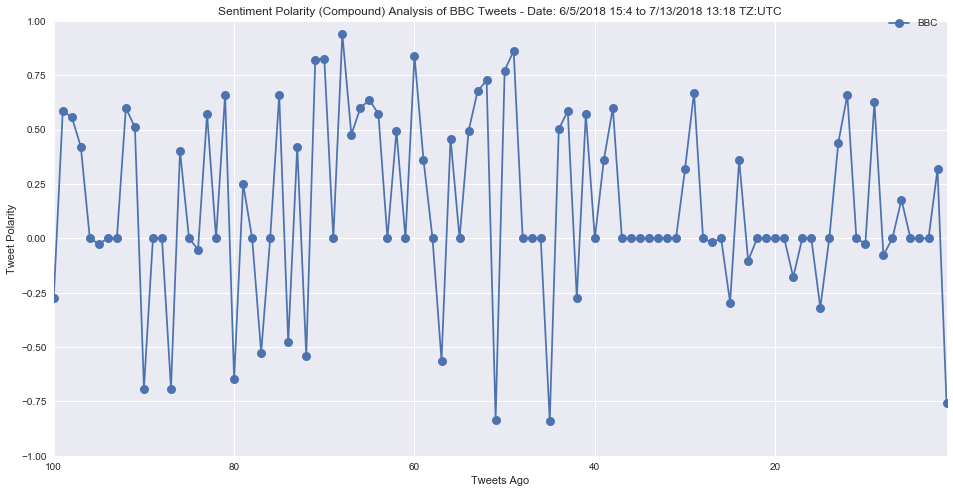

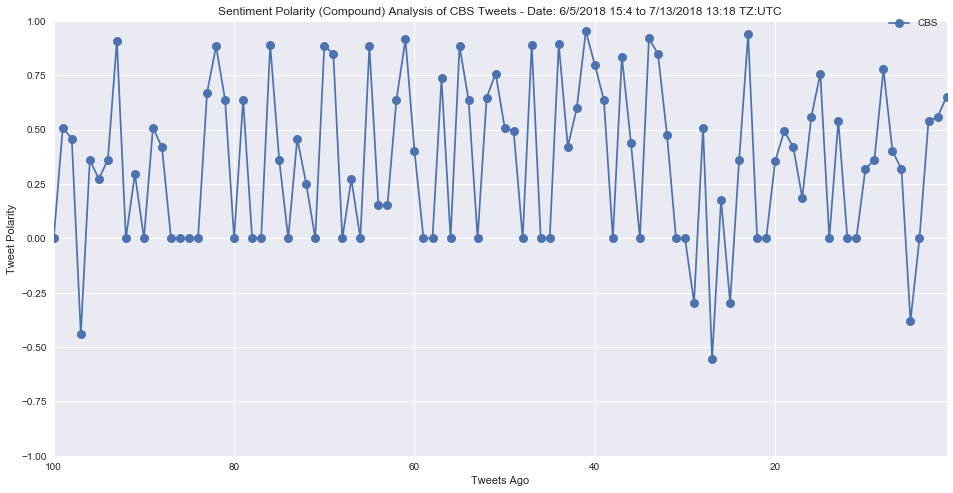

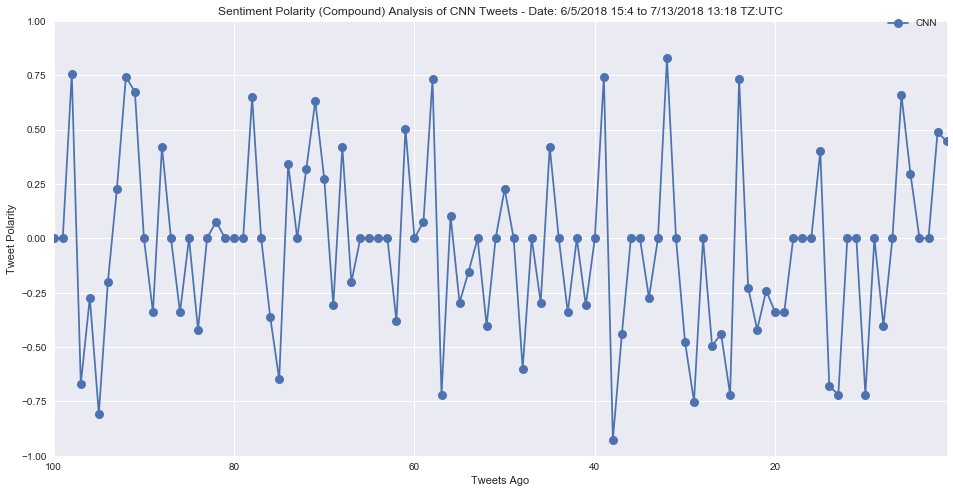

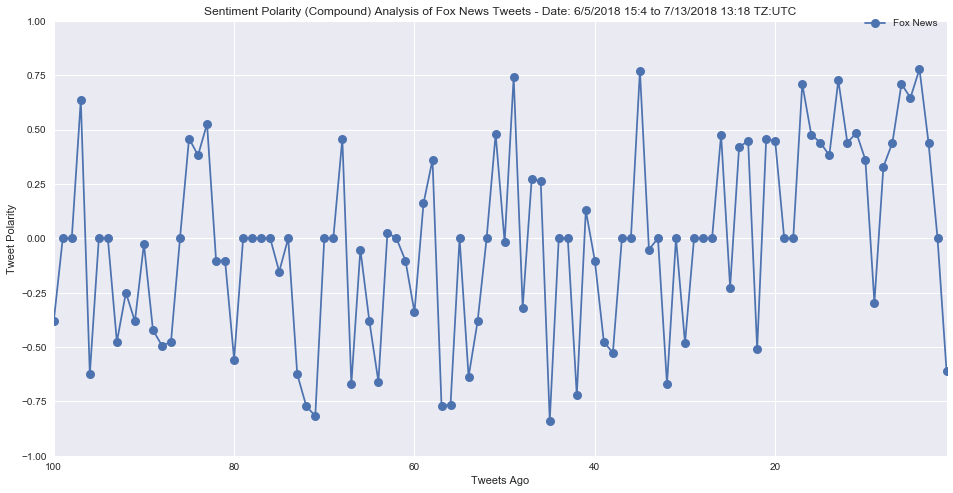

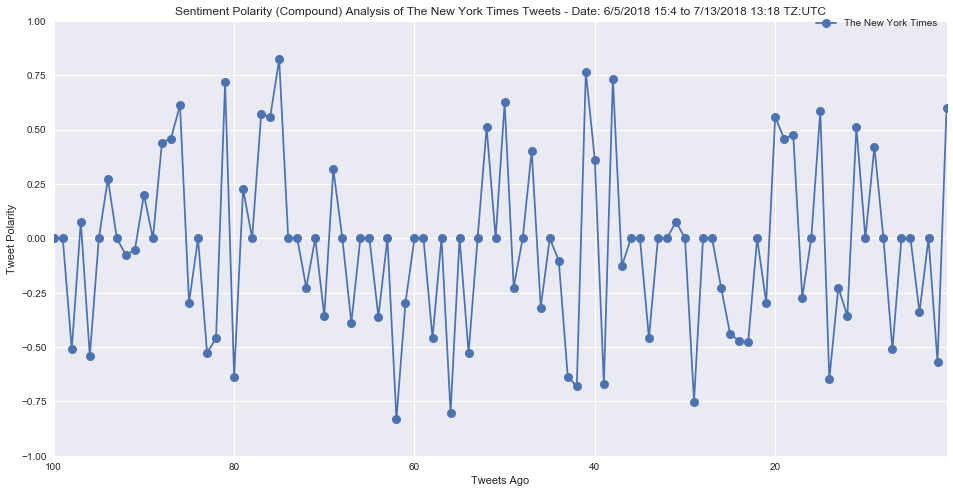

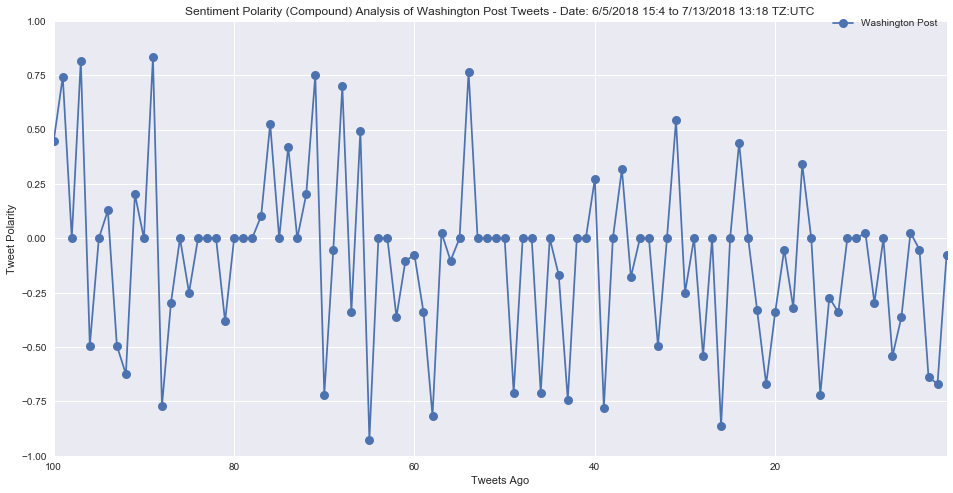

In [116]:

for news_outlet in news_outlets:
    compund[news_outlet].sort_index(ascending=False).plot(marker = 'o', grid=True,style='-', ms=9, figsize=(16,8))
    plt.legend(bbox_to_anchor=(1, 1.025))
    plt.xlabel('Tweets Ago')
    plt.ylabel('Tweet Polarity')
    plt.title(f'Sentiment Polarity (Compound) Analysis of {news_outlet} Tweets - Date: {date_start} to {date_end} TZ:UTC')
    plt.ylim(-1,1)
    plt.savefig(f'Sentiment Polarity Analysis {news_outlet}')

    plt.show();

##  Sentiment Polarity Analysis of all news_outlet

In [134]:
compund.min(), compund.max()

(News_outlet
 BBC                  -0.8402
 CBS                  -0.5562
 CNN                  -0.9259
 Fox News             -0.8399
 The New York Times   -0.8316
 Washington Post      -0.9260
 dtype: float64, News_outlet
 BBC                   0.9403
 CBS                   0.9523
 CNN                   0.8271
 Fox News              0.7783
 The New York Times    0.8225
 Washington Post       0.8316
 dtype: float64)

In [136]:
compundP = compund[(compund > .6) | (compund <-.6)]

In [137]:
compundP

News_outlet,BBC,CBS,CNN,Fox News,The New York Times,Washington Post
Tweet_number,,,,,,
1,-0.7579,0.6514,NaN,-0.6115,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,-0.6705
3,NaN,NaN,NaN,NaN,NaN,-0.6369
4,NaN,NaN,NaN,0.7783,NaN,NaN
5,NaN,NaN,NaN,0.6467,NaN,NaN
6,NaN,NaN,0.6597,0.7096,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.7777,NaN,NaN,NaN,NaN
9,0.6249,NaN,NaN,NaN,NaN,NaN


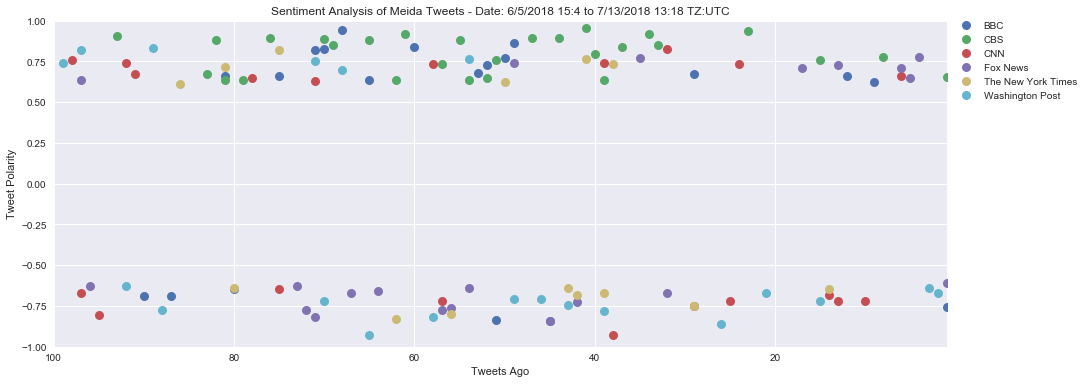

In [138]:
compundP.sort_index(ascending=False).plot(marker = 'o', grid=True,style=' ', ms=9, figsize=(16,6))
plt.legend(bbox_to_anchor=(1, 1.025))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title(f'Sentiment Analysis of Meida Tweets - Date: {date_start} to {date_end} TZ:UTC')
plt.ylim(-1,1)
plt.savefig('Sentiment Polarity Analysis all news outlets')
plt.show();

##  Sentiment Polarity Analysis of all news_outlet Bar plot ( mean) and Swarmplot 

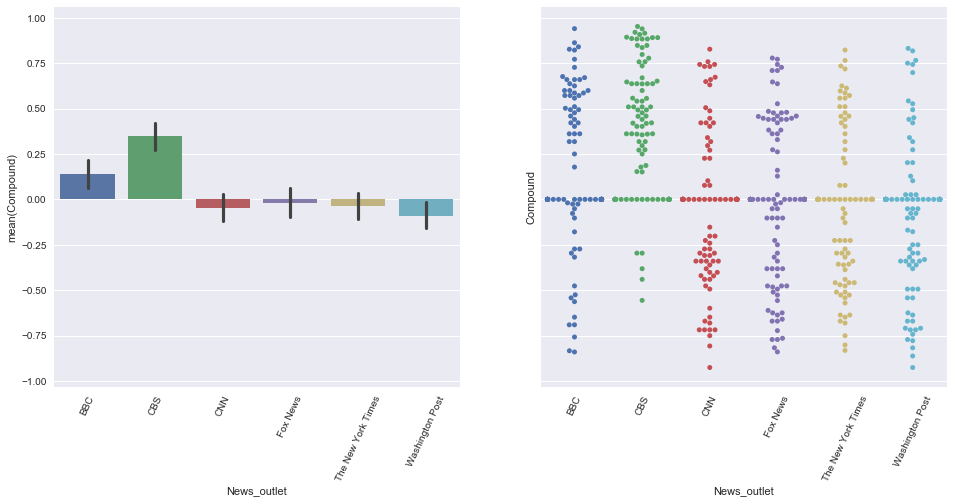

In [139]:
fig, axs = plt.subplots(ncols=2, figsize=(16,7), sharey=True)

a=sns.barplot(x='News_outlet', y='Compound', data=news_outlets_sentements, ax=axs[0])
for item in a.get_xticklabels():
    item.set_rotation(65)
b=sns.swarmplot(x='News_outlet', y='Compound', data=news_outlets_sentements, ax=axs[1])
for item in b.get_xticklabels():
    item.set_rotation(65)
plt.savefig('Bar Plots  - Swarm plot for Compound score')
plt.show()

## Kernel density estimaton - distribution of news outlets - compound score
Helps understand the data disputation
 

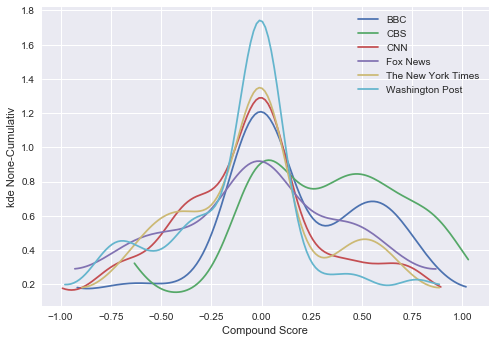

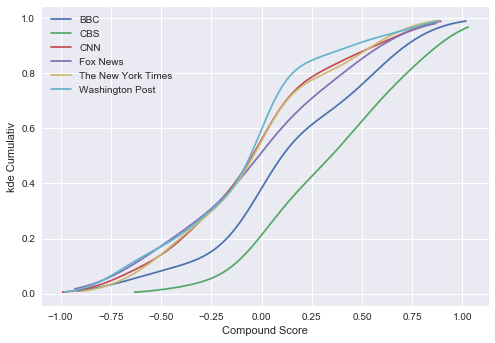

In [140]:
# create a histogram. By default it adds the kde (kernel density estimate)
for i in news_outlets:
    sns.kdeplot(compund[i], shade=False, cut=0.5, cumulative=False)
plt.xlabel('Compound Score')
plt.ylabel('kde None-Cumulativ')
plt.savefig('Kernel density estimaton')
plt.show()


# create a histogram. By default it adds the kde (kernel density estimate)
for i in news_outlets:
    sns.kdeplot(compund[i], shade=False, cut=0.5, cumulative=True)
plt.xlabel('Compound Score')
plt.ylabel('kde Cumulativ')
plt.savefig('Kernel density estimaton Cumulativ')
plt.show()

## Bar plot ( mean) Positive, Neutral and Negative sentements


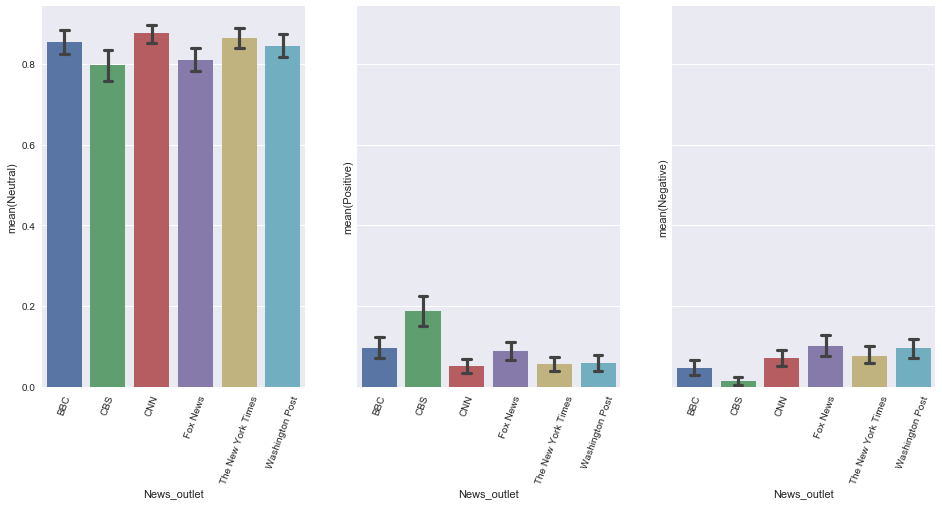

In [141]:
fig, axs = plt.subplots(ncols=3, figsize=(16,7), sharey=True)

a=sns.barplot(x='News_outlet', y='Neutral', data=news_outlets_sentements, ax=axs[0], capsize=.2)
for item in a.get_xticklabels():
    item.set_rotation(70)

b=sns.barplot(x='News_outlet', y='Positive', data=news_outlets_sentements, ax=axs[1] , capsize=.2)
for item in b.get_xticklabels():
    item.set_rotation(70)
    
c=sns.barplot(x='News_outlet', y='Negative', data=news_outlets_sentements, ax=axs[2], capsize=.2)
for item in c.get_xticklabels():
    item.set_rotation(70)
    
plt.savefig('Bar Plots All News Outlets')

plt.show()

## Sentiment score vs. Time Series plots  

In [142]:
def plot_time_scores(score):
    fig = plt.figure(figsize=(16,7))
    ax = fig.add_subplot(1, 1, 1)

    markers=['bo', 'go', 'ro', 'co', 'mo', 'ko']
    
    counter=0

    for news_outlet in news_outlets:
        data = news_outlets_sentements[news_outlets_sentements['News_outlet']==news_outlet]
        ax.plot(data.Date_time, data[score], markers[counter], label=news_outlet)
        counter+=1

    ax.legend()
    plt.title(f'Time vs Sentiment score ({score})')
    plt.xlabel('Time')
    plt.ylabel(f'{score} score')
    plt.savefig(f'timeS_Plots {score}')
    plt.show()

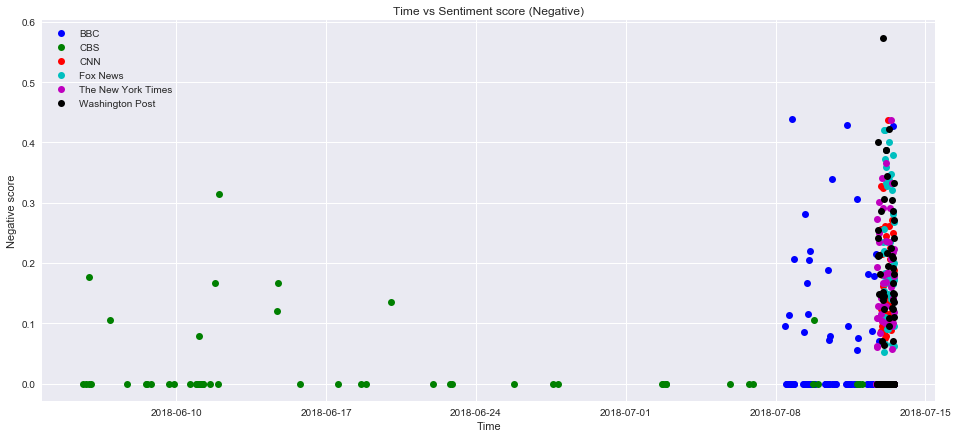

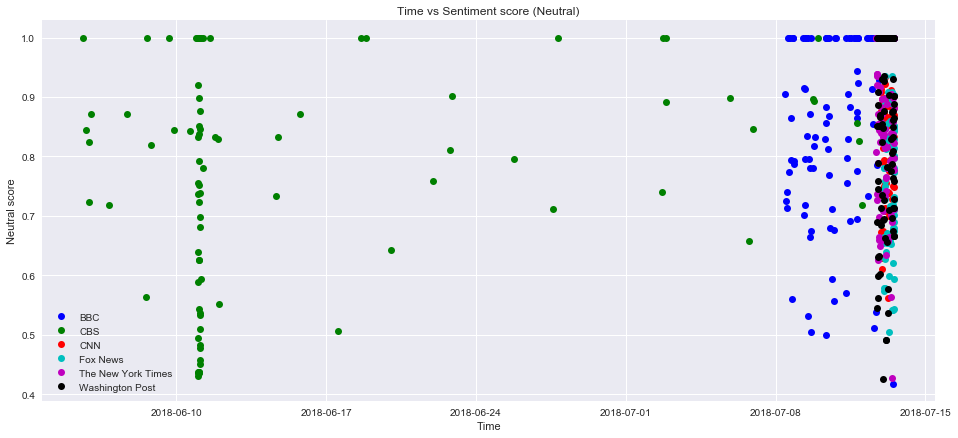

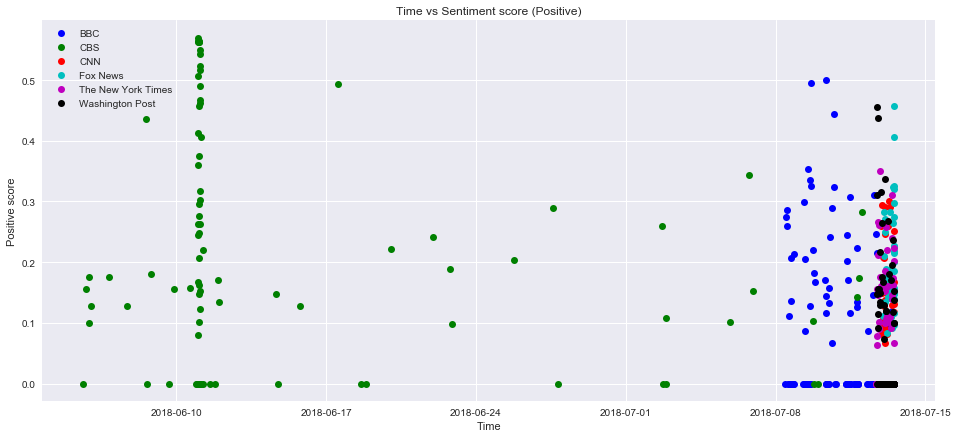

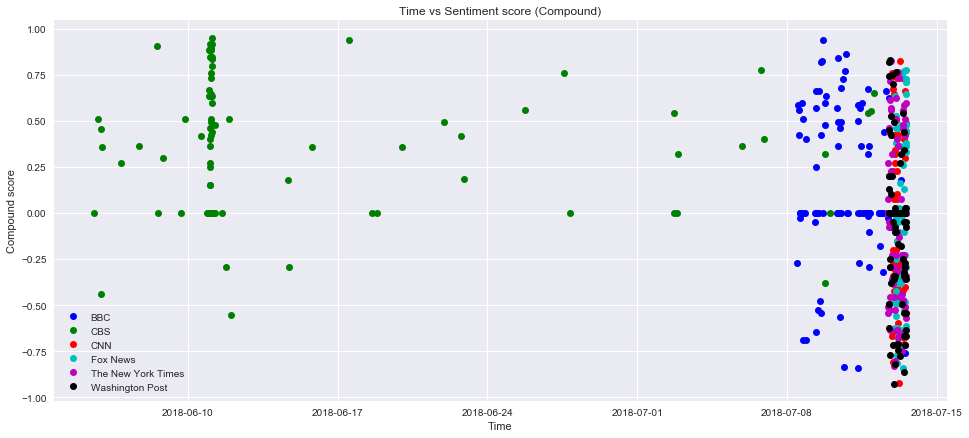

In [143]:
scores=['Negative', 'Neutral', 'Positive', 'Compound']
for score in scores:
    plot_time_scores(score)

In [144]:
news_outlets_sentements[['Date_time','Compound', 'News_outlet']].to_csv('news_outlets_Compound2.csv')

In [145]:
news_outlets_sentements

,Date_time,Compound,Negative,Neutral,News_outlet,Positive,Tweet,Tweet_number
0,2018-07-13 12:03:03+00:00,-0.7579,0.427,0.418,BBC,0.155,"The secret to a long, happy relationship? \n\n...",1
1,2018-07-13 11:03:03+00:00,0.3182,0.000,0.881,BBC,0.119,The original 1926 map of The Hundred Acre Wood...,2
2,2018-07-13 10:01:02+00:00,0.0000,0.000,1.000,BBC,0.000,RT @bbcproms: A Spectacular curtain raiser las...,3
3,2018-07-13 09:59:32+00:00,0.0000,0.000,1.000,BBC,0.000,RT @BBCTheOneShow: It's @ChrisGPackham UK Biob...,4
4,2018-07-13 08:03:04+00:00,0.0000,0.000,1.000,BBC,0.000,Who is the mysterious Hester Appleyard?\n\nNat...,5
5,2018-07-13 07:27:05+00:00,0.1779,0.000,0.909,BBC,0.091,"""I think the NHS is one of the biggest assets ...",6
6,2018-07-13 07:03:02+00:00,0.0000,0.000,1.000,BBC,0.000,⚠️ Watch out! ⚠️ Today is Friday the 13th...\n...,7
7,2018-07-12 20:02:02+00:00,-0.0772,0.071,0.929,BBC,0.000,"😺🎬 Meet Lisio, the ginger cat who jumped onto ...",8
8,2018-07-12 18:04:07+00:00,0.6249,0.000,0.785,BBC,0.215,Great Britain's John Curry was the world's fir...,9
9,2018-07-12 17:03:06+00:00,-0.0258,0.215,0.539,BBC,0.246,Not all heroes wear capes. This Australian div...,10
